# 🎬 Netflix 90s Movie EDA
Welcome! In this notebook, we explore Netflix's 1990s movie collection using Python.

The 90s were iconic for film — from *Titanic* to *Jurassic Park* — and this project dives deep into the genres, countries, directors, and more to uncover patterns in Netflix's nostalgic content.

This is a part of my DataCamp project series and showcases data visualization and storytelling skills.  


## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")


## Load the dataset

In [3]:
df = pd.read_csv("dataset/netflix_data.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


## Initial data overview

In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

####  There are no missing values, this dataset is very clean

## Distribution of Movies and Tv shows

Text(0.5, 1.0, 'Distribution of Movies vs TV Shows')

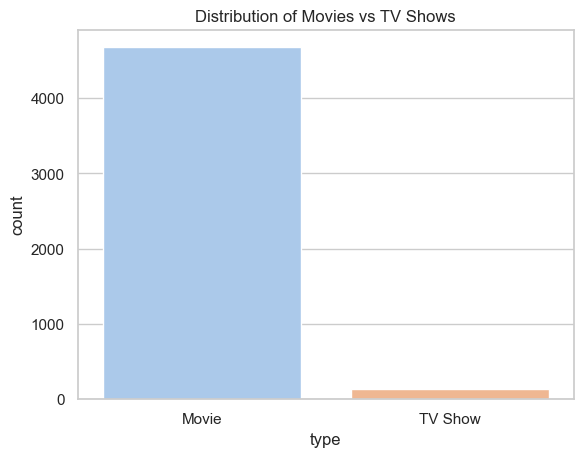

In [5]:
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Distribution of Movies vs TV Shows')


## Release Year Distributions

Text(0.5, 1.0, 'Release Year Distribution')

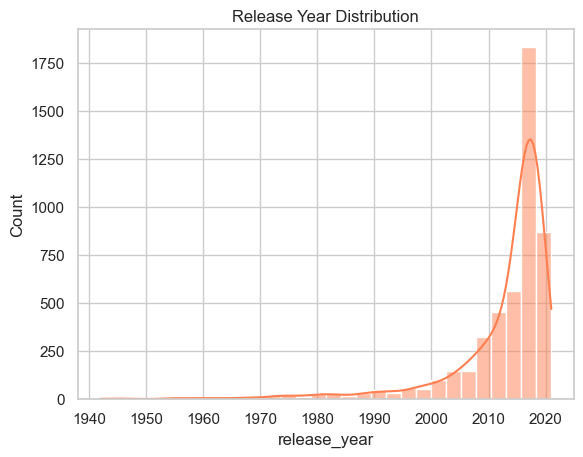

In [6]:
sns.histplot(df['release_year'], bins=30, kde=True, color='coral')
plt.title('Release Year Distribution')


## 🎥 5. Filter 1990s Movies

In [12]:
df_90s = df[(df['release_year'].between(1990, 1999)) & (df['type'] == 'Movie')]
df_90s.shape

(183, 11)

## 🍿 6. Top Genres

Text(0.5, 1.0, 'Top Genres in 1990s Movies')

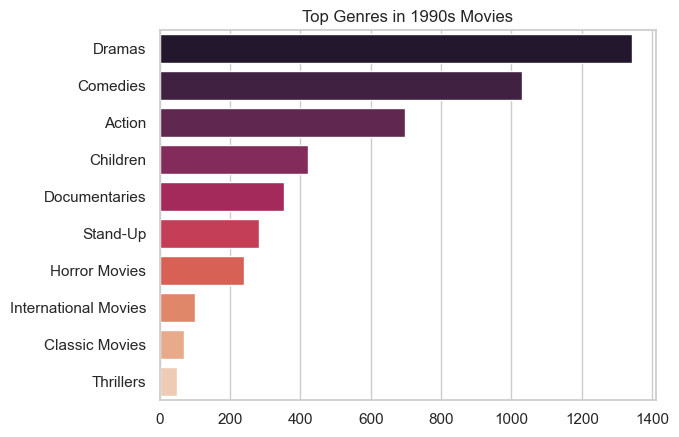

In [18]:
top_genres = df['genre'].value_counts().head(10)
sns.barplot(x = top_genres.values, y = top_genres.index, palette = 'rocket')
plt.title('Top Genres in 1990s Movies')

### ✔️ Word Cloud:

(-0.5, 399.5, 199.5, -0.5)

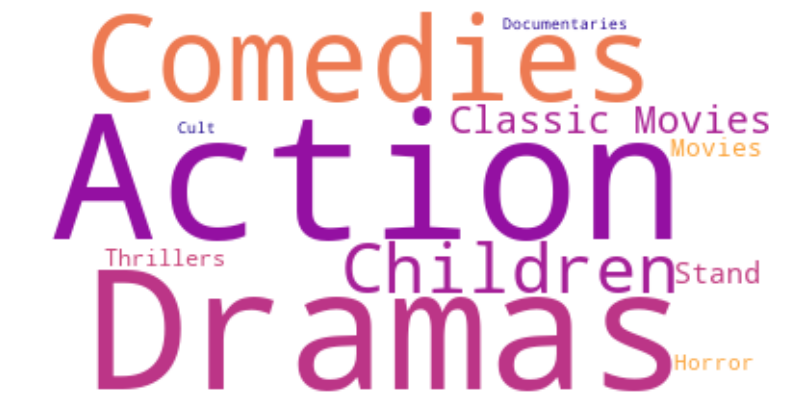

In [19]:
text = " ".join(df_90s['genre'].dropna())
wordcloud = WordCloud(background_color='white', colormap='plasma').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


## 🌍 7. Country Distribution

Text(0.5, 1.0, 'Top Countries Producing 90s Movies')

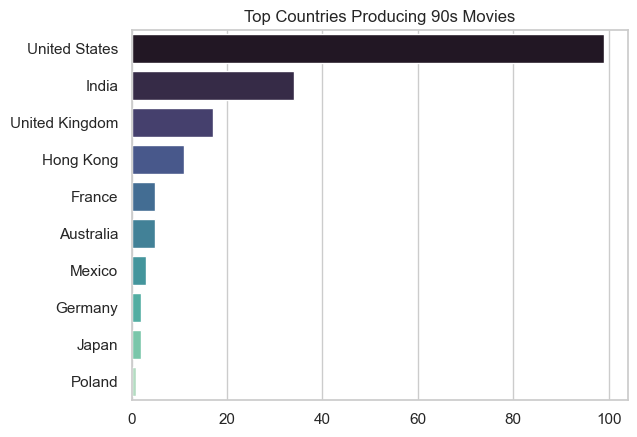

In [20]:
top_countries = df_90s['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title('Top Countries Producing 90s Movies')


Text(0.5, 1.0, 'Top 10 Directors of 90s Movies')

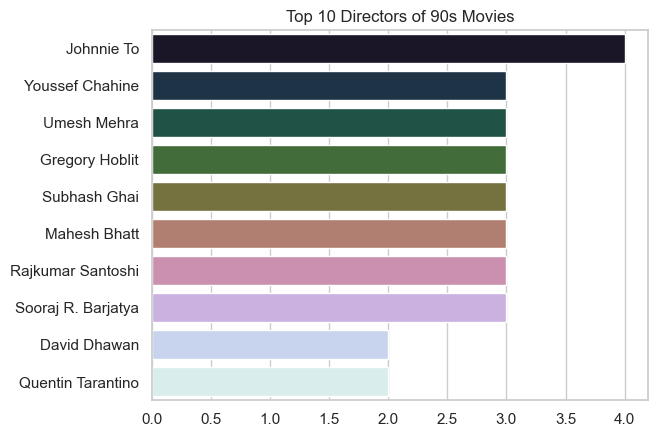

In [22]:
top_directors = df_90s['director'].dropna().value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')
plt.title('Top 10 Directors of 90s Movies')


Text(0.5, 1.0, 'Most Common Actors in 90s Movies')

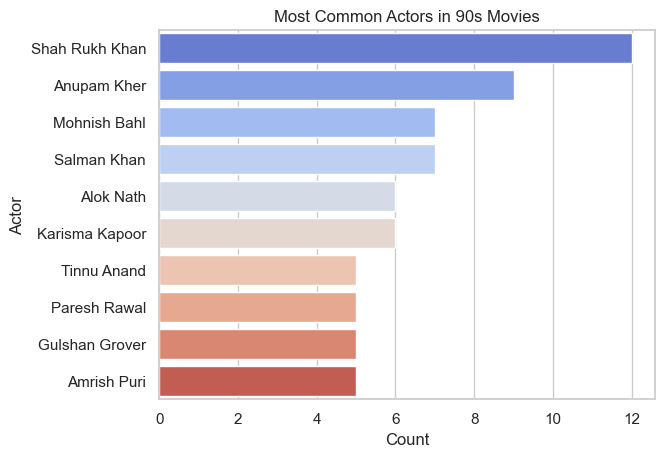

In [23]:
from collections import Counter

cast_series = df_90s['cast'].dropna().apply(lambda x: x.split(', '))
flat_cast = [actor for sublist in cast_series for actor in sublist]
actor_counts = Counter(flat_cast)
top_actors = actor_counts.most_common(10)

actors_df = pd.DataFrame(top_actors, columns=['Actor', 'Count'])
sns.barplot(x='Count', y='Actor', data=actors_df, palette='coolwarm')
plt.title('Most Common Actors in 90s Movies')


(-0.5, 399.5, 199.5, -0.5)

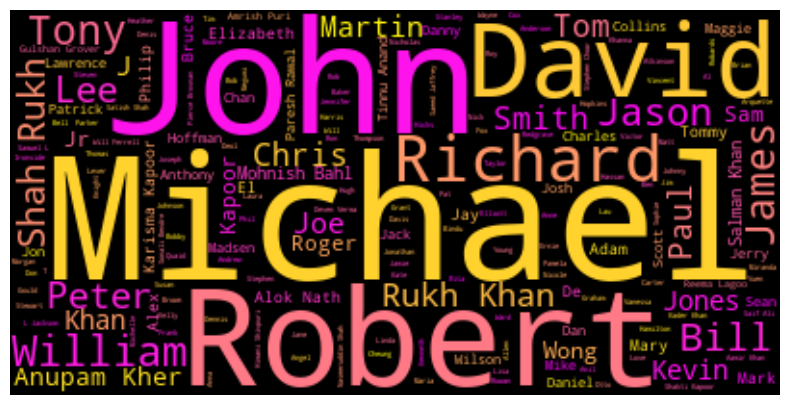

In [24]:
actor_text = " ".join(flat_cast)
wordcloud = WordCloud(background_color='black', colormap='spring').generate(actor_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


Text(0.5, 1.0, 'Movie Duration Distribution in 90s')

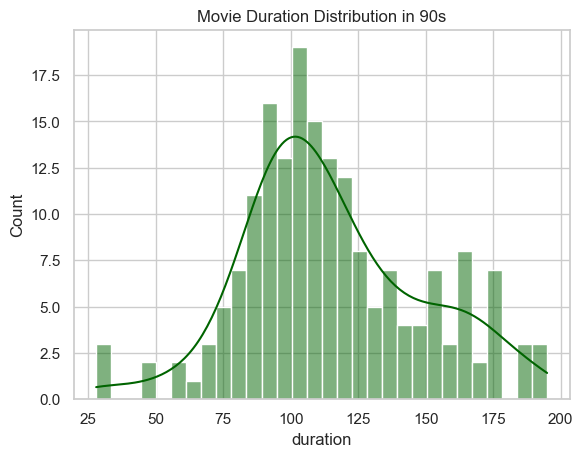

In [25]:
sns.histplot(df_90s['duration'].dropna(), bins=30, kde=True, color='darkgreen')
plt.title('Movie Duration Distribution in 90s')


Text(0.5, 1.0, 'Year 90s Movies Were Added to Netflix')

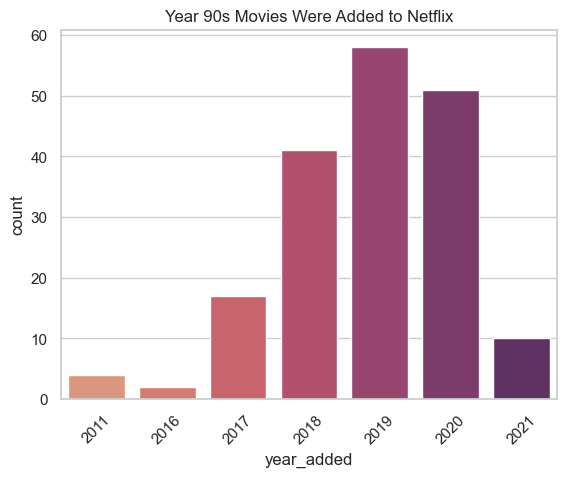

In [26]:
df_90s['date_added'] = pd.to_datetime(df_90s['date_added'])
df_90s['year_added'] = df_90s['date_added'].dt.year

sns.countplot(x='year_added', data=df_90s, palette='flare')
plt.xticks(rotation=45)
plt.title('Year 90s Movies Were Added to Netflix')


(-0.5, 799.5, 399.5, -0.5)

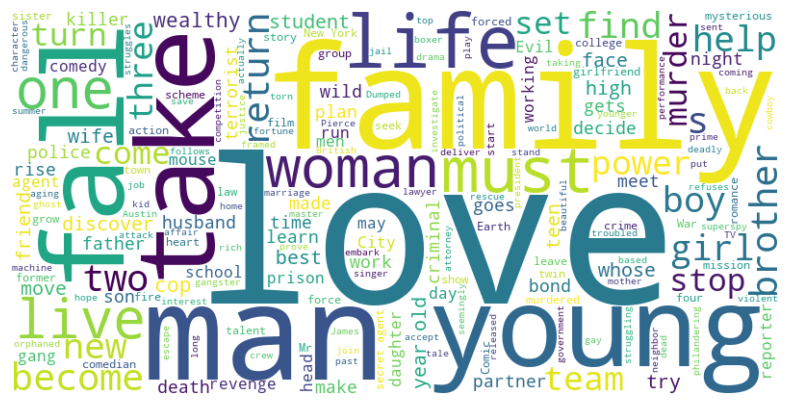

In [27]:
desc_text = " ".join(df_90s['description'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(desc_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')


# 📌 Conclusion
- The most dominant genres in the 90s were...
- Most movies came from [countries] and were directed by [top directors].
- Common themes include action, family, love, and drama.

This analysis demonstrates how to draw insights from real-world data, explore aesthetics, and create compelling visual storytelling.

Stay tuned for more projects — and feel free to ⭐️ this repo!
